In [1]:
import pandas as pd
import numpy as np 

# Load the data

In [2]:
df = pd.read_csv('../Data/Clean_data.csv')

In [3]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Screen,ScreenW,ScreenH,...,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Price,Display_Size,Weight_category,Weight_per_inch,Brand_Category
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1370,Standard,2560,1600,...,0,SSD,No,Intel,Iris Plus Graphics 640,137050.287,Average,Light_weight,103.007519,Premium
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1340,Standard,1440,900,...,0,Flash Storage,No,Intel,HD Graphics 6000,91961.562,Average,Light_weight,100.751880,Premium
2,HP,250 G6,Notebook,15.6,8,No OS,1860,Full HD,1920,1080,...,0,SSD,No,Intel,HD Graphics 620,58822.500,Large,Average_weight,119.230769,Mid-range
3,Apple,MacBook Pro,Ultrabook,15.4,8,macOS,1830,Standard,2880,1800,...,0,SSD,No,AMD,Radeon Pro 455,259581.135,Large,Average_weight,118.831169,Premium
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1370,Standard,2560,1600,...,0,SSD,No,Intel,Iris Plus Graphics 650,184508.280,Average,Light_weight,103.007519,Premium


Split the data X and y

In [4]:
X  = df.drop(['Price'], axis =1)
y = df['Price']

# Split my data Train and testing data 

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [7]:
obj_col = ['Company', 'Product', 'TypeName', 'OS', 'Screen', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_model',
       'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company',
       'GPU_model', 'Display_Size', 'Weight_category', 'Brand_Category']

In [8]:
num_col = ['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq',
       'PrimaryStorage', 'SecondaryStorage', 'Weight_per_inch']

Scaling training and testiing data

In [9]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import pandas as pd

# Scale numeric columns
scaler = StandardScaler()
X_train_num = pd.DataFrame(scaler.fit_transform(X_train[num_col]),
                           columns=num_col, index=X_train.index)
X_test_num = pd.DataFrame(scaler.transform(X_test[num_col]),
                          columns=num_col, index=X_test.index)

Encoding for categorical columns

In [10]:

encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

X_train_cat = pd.DataFrame(encoder.fit_transform(X_train[obj_col]),
                           columns=obj_col, index=X_train.index)

X_test_cat = pd.DataFrame(encoder.transform(X_test[obj_col]),
                          columns=obj_col, index=X_test.index)

Concate the X_train process data and y_train process data

In [11]:
# Final combined data
X_train_processed = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_processed = pd.concat([X_test_num, X_test_cat], axis=1)

Create the Heat map

In [12]:
final_df = pd.concat([X_train_processed, y_train], axis = 1)

<Axes: >

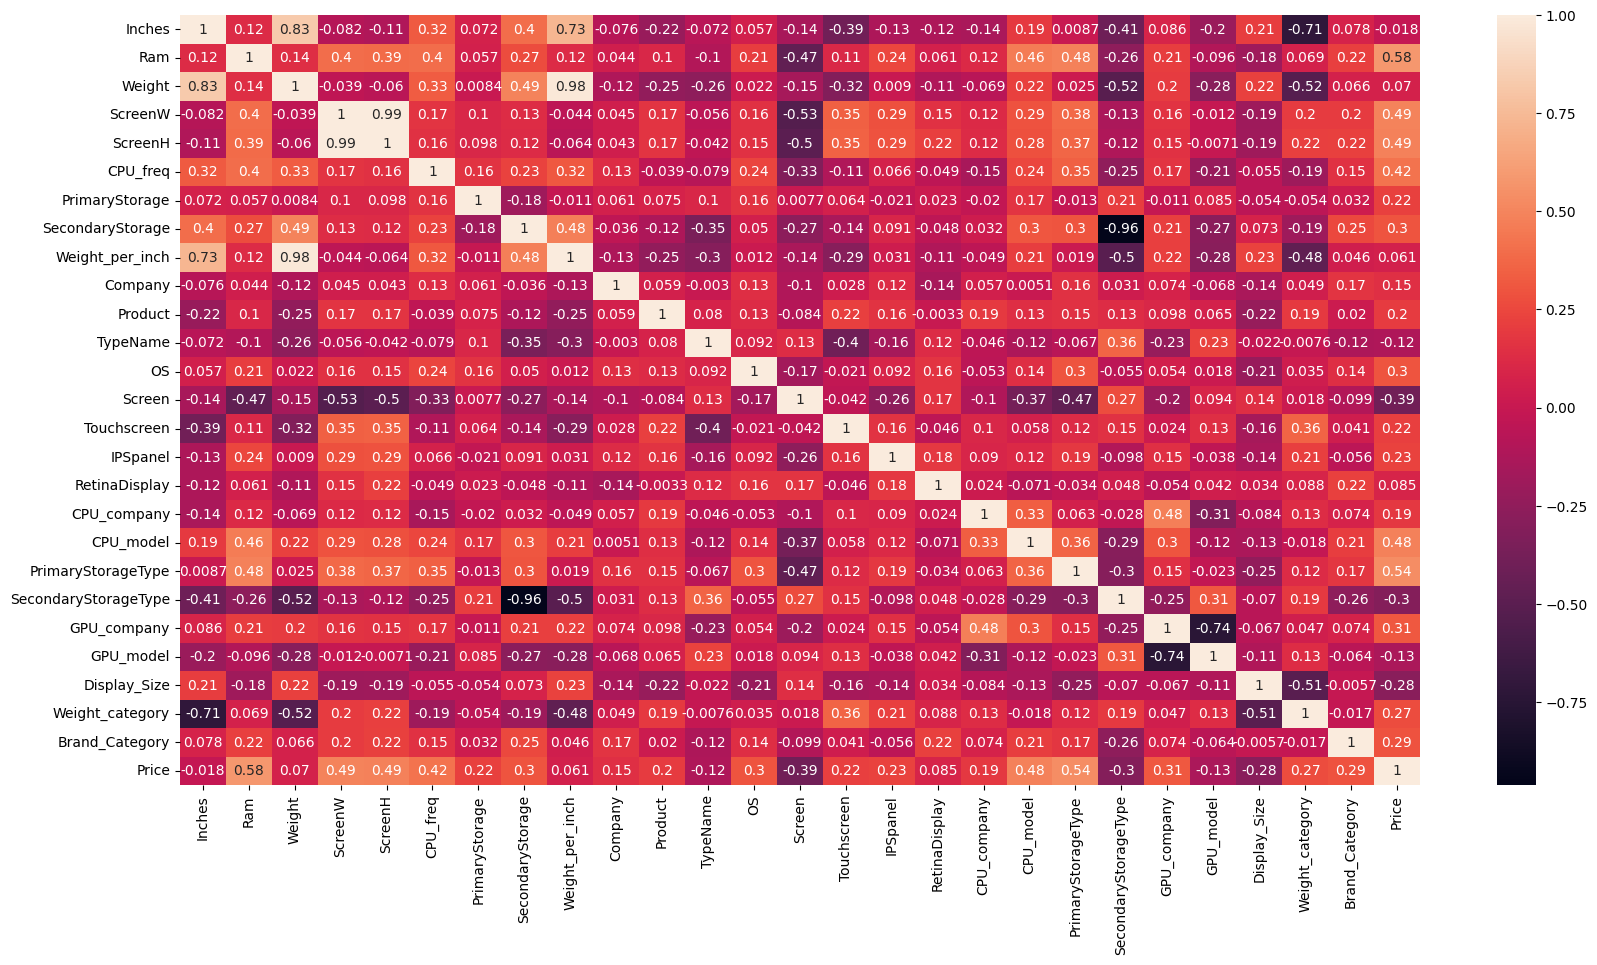

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 10))
sns.heatmap(final_df.corr(), annot = True)

Import all models and metrics

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score , KFold 

Moddel tuning

In [15]:
models = {
    "XGBRegressor": XGBRegressor( 
    n_estimators=500,
    learning_rate=0.013,    
    max_depth=4,           
    subsample=0.5,         
    colsample_bytree=0.61,  
    reg_alpha=9,        
    reg_lambda=0.4,       
    min_child_weight=0.3, 
    random_state=42
    ),

    'LinearRegression': LinearRegression(),
    
    "RandomForestRegressor": RandomForestRegressor(
        n_estimators=300,      
        max_depth=10,           
        min_samples_split=20,  
        min_samples_leaf=10,   
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    ),
    
    "GradientBoostingRegressor": GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.03,    
        max_depth=4,           
        min_samples_split=30, 
        min_samples_leaf=15,  
        subsample=0.7,         
        max_features='sqrt',     
        random_state=42
    ),
    
    
    "CatBoost": CatBoostRegressor(
        iterations=1000,
        learning_rate=0.03,    
        depth=3,               
        l2_leaf_reg=15,       
        min_data_in_leaf=20,     
        random_strength=1.0,     
        bagging_temperature=0.8, 
        early_stopping_rounds=50,
        verbose=0,
        random_state=42
    )
}

Model Traning Part

In [16]:
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    
    y_pred = model.predict(X_test_processed)
    y_train_pred = model.predict(X_train_processed)
    y_test_pred = model.predict(X_test_processed)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_pred)
    r2_gap = r2_train - r2_test

    n = X_test_processed.shape[0]
    p = X_test_processed.shape[1]
    adj_r2 = 1 - ((1 - r2) * (n - p))/ (n - p - 1)

    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)

    kfold = KFold(n_splits = 10, shuffle = True, random_state=42)
    score1 = cross_val_score(model, X_train_processed, y_train, cv = kfold, scoring = 'r2')
    score2 = cross_val_score(model, X_test_processed, y_test, cv = kfold, scoring = 'r2')

    print(f'{name} model,\nadj_r2 is {adj_r2}\nMAE is {MAE}\nMSE is {MSE}')
    print(f' \n r2 score is {r2}\nr2 train is {r2_train},\n r2 test is {r2_test}\n r2 gap  is {r2_gap}\n\n')

    print(f'traning cross val score is {score1}')
    print(f'testing cross val score is {score2}\n\n\n')

XGBRegressor model,
adj_r2 is 0.8339507755848887
MAE is 16216.82494543457
MSE is 485587382.990956
 
 r2 score is 0.8355787091575859
r2 train is 0.8848376276164056,
 r2 test is 0.8355787091575859
 r2 gap  is 0.04925891845881969


traning cross val score is [0.78943189 0.83315158 0.82289639 0.69320881 0.81868398 0.79422867
 0.749031   0.74045459 0.78674755 0.70885175]
testing cross val score is [0.44972204 0.6662836  0.6635383  0.81155372 0.74024192 0.25241591
 0.86294449 0.70800004 0.56807555 0.86109537]



LinearRegression model,
adj_r2 is 0.6291388007478484
MAE is 24674.969611349195
MSE is 1084530926.4892364
 
 r2 score is 0.6327746948581636
r2 train is 0.665143232170438,
 r2 test is 0.6327746948581636
 r2 gap  is 0.032368537312274404


traning cross val score is [0.68672556 0.67556851 0.66179476 0.49104886 0.68533508 0.67370821
 0.60913447 0.60582158 0.6671819  0.6149321 ]
testing cross val score is [ 0.38546487  0.42692025  0.25322403  0.7427825   0.65373181 -0.08974359
  0.8015591 

# Observation
1- Best model is XGBRegressor \n\
2- R2 score of model is 83.5% \n\
3- Adjusted r2 is 83.3% \n\
4- R2 gap in training and testion data is 0.049 \n\
5- Cros val score in training data is arround 69 - 83% \n\
6- Cros val score in tessing data is arround 25 - 86% \n\



# Result 
1- My best performing model is XGbRegressor \n\
2- R2 gap is lower then 0.05 that is good sign model is not overfitted \n\
3- R2 and Adj_r2 is very close because the model is genralize \n\
4- Testng cros val score fluctuates so much because my data set is so small \n\
5- Overall the model is generalize and it predict well

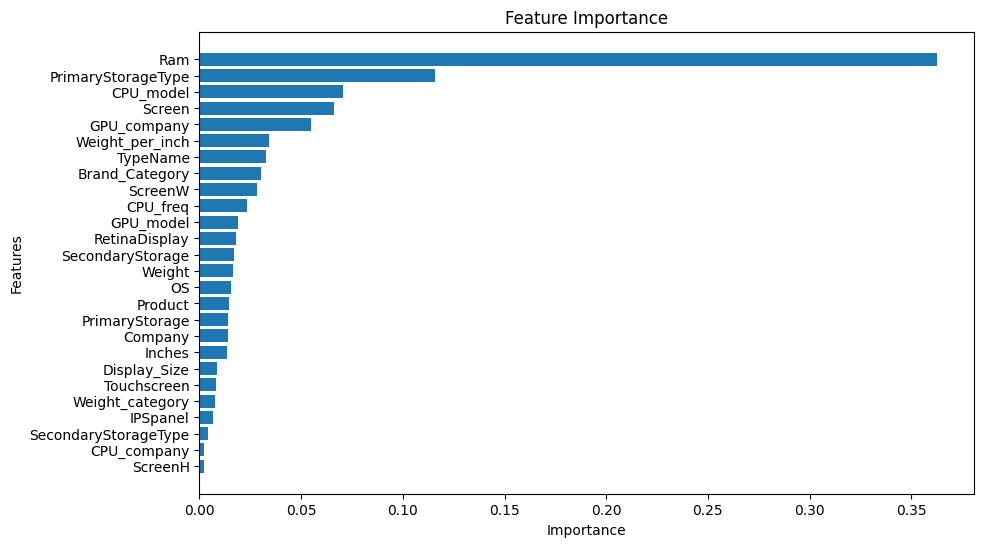

In [ ]:
import matplotlib.pyplot as plt

# Train model
model = XGBRegressor()
model.fit(X_train_processed, y_train)

# Feature importance nikalna
importance = model.feature_importances_
feature_imp = pd.DataFrame({
    'Feature': X_train_processed.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Chart plot karna
plt.figure(figsize=(10,6))
plt.barh(feature_imp['Feature'], feature_imp['Importance'])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

Create the pipeline for model saving

In [ ]:
from xgboost import XGBRFRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as ImbPipeline

df = pd.read_csv('../Data/Clean_data.csv')

Target_col = 'Price'
num_col = ['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq',
       'PrimaryStorage', 'SecondaryStorage', 'Weight_per_inch']
obj_col = ['Company', 'Product', 'TypeName', 'OS', 'Screen', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_model',
       'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company',
       'GPU_model', 'Display_Size', 'Weight_category', 'Brand_Category']
X = df[num_col + obj_col]
y = df[Target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_col),
    ('cat', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), obj_col)
])

pipeline = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', XGBRegressor(
    n_estimators=500,
    learning_rate=0.013,    
    max_depth=4,           
    subsample=0.5,         
    colsample_bytree=0.61,  
    reg_alpha=9,        
    reg_lambda=0.4,       
    min_child_weight=0.3, 
    random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("r2 score is", r2)

with open('Xgb_model.pkl', "wb") as f:  
    pickle.dump(pipeline, f)
print("Full pipeline saved successfully!")

r2 score is 0.8355787091575859
Full pipeline saved successfully!
